# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pylab as plt

from tqdm import tqdm

# Load data

In [2]:
df = gpd.read_file('raw/comptages-routiers-station.geojson')

(-2.1097183227539062,
 -1.4067942817651977,
 47.87247991493345,
 48.34187437419833)

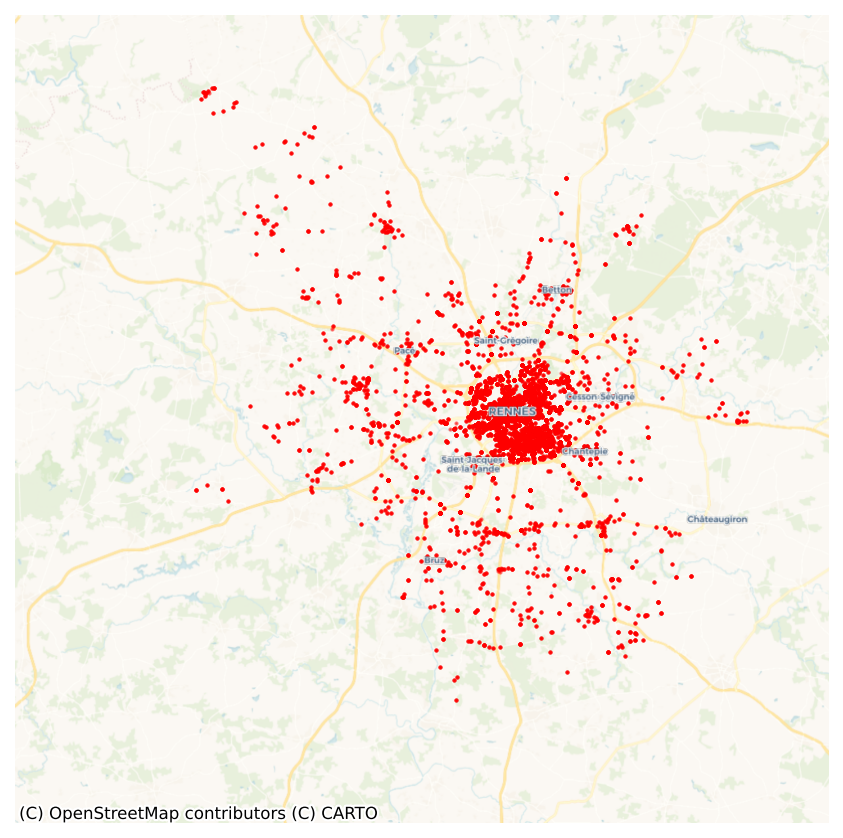

In [3]:
# Plot sensors
#plt.figure(figsize = (10,10), dpi = 300)
import contextily as cx
fig, ax = plt.subplots(figsize = (7,7), dpi = 150)
df.plot(ax=ax, color = 'r', markersize = 1, alpha = .5)
# Add context in backround
cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

In [4]:
df.annee.value_counts().sort_index()

annee
1995     145
1996     192
1997     201
1998     175
1999     205
2000     192
2001     131
2002     175
2003      57
2004     156
2005     126
2006     219
2007     198
2008     137
2009     286
2010     430
2011     472
2012     420
2013     435
2014     516
2015     460
2016     650
2017     908
2018     967
2019    1239
2020     608
2021     967
2022    1042
2023     863
2024     903
Name: count, dtype: int64

In [5]:
df.columns

Index(['geo_point_2d', 'geo_shape', 'code_rm', 'annee', 'sens', 'nb_semaines',
       'fiabilite', 'wms_time', 'tmja_tv', 'tmja_tv_formate', 'tmja_tv_carto',
       'tmja_pl', 'tmja_pl_formate', 'tmja_pl_carto', 'v85_tv',
       'v85_tv_formate', 'v85_pl', 'v85_pl_formate', 'v_moyenne_tv',
       'v_moyenne_tv_formate', 'v_moyenne_pl', 'v_moyenne_pl_formate',
       'debit_hpm_tv', 'debit_hpm_tv_formate', 'debit_hpm_tv_carto',
       'debit_hps_tv', 'debit_hps_tv_formate', 'debit_hps_tv_carto',
       'debit_hpm_pl', 'debit_hpm_pl_formate', 'debit_hpm_pl_carto',
       'debit_hps_pl', 'debit_hps_pl_formate', 'debit_hps_pl_carto',
       'geometry'],
      dtype='object')

In [6]:
df[[ 'wms_time', 'tmja_tv', 'tmja_tv_formate', 'tmja_tv_carto',
       'tmja_pl', 'tmja_pl_formate', 'tmja_pl_carto', 'v85_tv',
       'v85_tv_formate', 'v85_pl', 'sens']].head()

,wms_time,tmja_tv,tmja_tv_formate,tmja_tv_carto,tmja_pl,tmja_pl_formate,tmja_pl_carto,v85_tv,v85_tv_formate,v85_pl,sens
0,2005-01-01 01:00:00+01:00,10434.5,10 434,59.0,NaN,None,NaN,NaN,None,NaN,Sens cumulés
1,2011-01-01 01:00:00+01:00,8755.3,8 755,54.0,181.4,181,7.8,66.9,67,62.3,Sens cumulés
2,2018-01-01 01:00:00+01:00,20238.2,20 238,82.1,418.7,419,11.8,62.7,63,58.3,Sens cumulés
3,2020-01-01 01:00:00+01:00,3543.7,3 544,34.4,88.7,89,5.4,56.2,56,48.3,Sud-Nord / Est-Ouest
4,2011-01-01 01:00:00+01:00,8641.8,8 642,53.7,181.8,182,7.8,55.5,56,48.6,Sens cumulés


In [7]:
df.sens.value_counts()

sens
Sens cumulés            5921
Nord-Sud / Ouest-Est    3803
Sud-Nord / Est-Ouest    3628
Voie 1                    62
Voie 2                    61
Name: count, dtype: int64

In [8]:
df = df[~df.sens.isin(['Voie 1', 'Voie 2'])]

In [9]:
df.columns

Index(['geo_point_2d', 'geo_shape', 'code_rm', 'annee', 'sens', 'nb_semaines',
       'fiabilite', 'wms_time', 'tmja_tv', 'tmja_tv_formate', 'tmja_tv_carto',
       'tmja_pl', 'tmja_pl_formate', 'tmja_pl_carto', 'v85_tv',
       'v85_tv_formate', 'v85_pl', 'v85_pl_formate', 'v_moyenne_tv',
       'v_moyenne_tv_formate', 'v_moyenne_pl', 'v_moyenne_pl_formate',
       'debit_hpm_tv', 'debit_hpm_tv_formate', 'debit_hpm_tv_carto',
       'debit_hps_tv', 'debit_hps_tv_formate', 'debit_hps_tv_carto',
       'debit_hpm_pl', 'debit_hpm_pl_formate', 'debit_hpm_pl_carto',
       'debit_hps_pl', 'debit_hps_pl_formate', 'debit_hps_pl_carto',
       'geometry'],
      dtype='object')

In [10]:
df.code_rm.unique().size

2052

In [11]:
df.geometry.unique().size

2048

In [12]:
df[df.code_rm == 'V5F35.8'][['code_rm', 'annee', 'sens', 'nb_semaines',
       'fiabilite', 'wms_time', 'tmja_tv', 'tmja_tv_formate', 'tmja_tv_carto',
       'tmja_pl', 'geometry']]
# We should remove directed counts in places where we have the double counting on the same location

,code_rm,annee,sens,nb_semaines,fiabilite,wms_time,tmja_tv,tmja_tv_formate,tmja_tv_carto,tmja_pl,geometry
3159,V5F35.8,2011,Sens cumulés,1.4,#9dc2e4,2011-01-01 01:00:00+01:00,5332.1,5 332,42.2,NaN,POINT (-1.69463 48.1006)
6921,V5F35.8,2011,Nord-Sud / Ouest-Est,1.4,#9dc2e4,2011-01-01 01:00:00+01:00,2907.7,2 908,31.1,NaN,POINT (-1.69463 48.1006)
6922,V5F35.8,2011,Sud-Nord / Est-Ouest,1.4,#9dc2e4,2011-01-01 01:00:00+01:00,2424.4,2 424,28.4,NaN,POINT (-1.69463 48.1006)


In [13]:
c = 0
l_df = []
l_const = []
for code in tqdm(df.code_rm.unique()):
    for year in df[df.code_rm == code].annee.unique():
        sub = df[(df.code_rm == code) & (df.annee == year)]
        if 'Sens cumulés' not in sub.sens.values:
            # Do we have both directions and we just need to sum ?
            if sub.sens.values.size == 2:
                l_const.append(pd.DataFrame(index = [1],
                                            data={
                                'annee':year,
                                'code_rm' : code,
                                'sens': 'Sens cumulés',
                                'tmja_tv' : sub.tmja_tv.sum(),
                                'tmja_pl' :sub.tmja_pl.sum(), 
                                # Mean for speeds
                                'v85_tv' : sub.v85_tv.mean(),
                                'v85_pl' : sub.v85_pl.mean(), 
                                'v_moyenne_tv' : sub.v_moyenne_tv.mean(),
                                'v_moyenne_pl' : sub.v_moyenne_pl.mean(), 
                                'geometry' : sub.iloc[0].geometry
                                        }))
            elif  sub.sens.values.size == 1:
            # In that case we only have oneway (this is quite rare)
                c+=1
                l_df.append(df[(df.code_rm == code) & (df.annee == year)])
            else :
                print(sub)
df_directed = pd.concat(l_df)
df_const = pd.concat(l_const)
c

100%|██████████| 2052/2052 [00:10<00:00, 197.61it/s]


248

In [14]:
df_directed[['code_rm', 'annee']].duplicated().sum() == df_const[['code_rm', 'annee']].duplicated().sum() == df[df.sens == 'Sens cumulés'][['code_rm', 'annee']].duplicated().sum() == 0

True

In [15]:
# We'll combine both direction and only directed 
df = pd.concat([
    df[df.sens == 'Sens cumulés'],
    df_const,
    df_directed
])

In [16]:
df[['code_rm', 'annee']].duplicated().sum()

0

In [17]:
d = {
    'Sens cumulés' : False, 
    'Sud-Nord / Est-Ouest' : True, 
    'Nord-Sud / Ouest-Est': True,
       'Voie 1': True, 
       'Voie 2': True
}

df['raw_oneway'] = df.sens.apply(lambda x : d[x])

In [18]:
df.rename(columns = {
        'tmja_tv' : 'AADT',
        'tmja_pl' :'TR_AADT', 
        'v85_tv' : 's85',
        'v85_pl' : 'TR_s85', 
        'v_moyenne_tv' : 'savg',
        'v_moyenne_pl' : 'TR_savg', 
        'sens':'raw_direction'
}, inplace=True)

In [19]:
df.dropna(subset=['AADT', 'geometry'], inplace=True)

In [20]:
df.loc[~df.raw_oneway, 'raw_direction'] = np.nan

In [21]:
df[['AADT', 'TR_AADT', 's85', 'TR_s85', 'savg', 'TR_savg', 'raw_oneway', 'raw_direction']]

,AADT,TR_AADT,s85,TR_s85,savg,TR_savg,raw_oneway,raw_direction
0,10434.5,NaN,NaN,NaN,NaN,NaN,False,NaN
1,8755.3,181.4,66.9,62.3,59.7,55.4,False,NaN
2,20238.2,418.7,62.7,58.3,51.9,48.3,False,NaN
4,8641.8,181.8,55.5,48.6,45.6,41.6,False,NaN
5,8607.2,165.7,55.2,48.4,45.5,41.4,False,NaN
...,...,...,...,...,...,...,...,...
5235,239.0,NaN,28.1,NaN,19.8,NaN,True,Nord-Sud / Ouest-Est
6831,433.0,NaN,36.6,NaN,26.7,NaN,True,Nord-Sud / Ouest-Est
12104,2155.6,NaN,NaN,NaN,NaN,NaN,True,Nord-Sud / Ouest-Est
7834,3861.6,NaN,NaN,NaN,NaN,NaN,True,Nord-Sud / Ouest-Est


In [22]:
df[df.code_rm == 'MA335.3'][['annee', 'AADT', 'TR_AADT', 's85', 'TR_s85', 'savg', 'TR_savg', 'raw_oneway', 'raw_direction']]

,annee,AADT,TR_AADT,s85,TR_s85,savg,TR_savg,raw_oneway,raw_direction
1,2020,2970.9,0.0,NaN,NaN,NaN,NaN,False,NaN
7834,2022,3861.6,NaN,NaN,NaN,NaN,NaN,True,Nord-Sud / Ouest-Est


In [23]:
df.set_index('code_rm', inplace=True)

In [24]:
df.index.unique().size

2048

In [25]:
df.geometry.unique().size

2048

# Map Matching with OSM

In [26]:
gdf = df.drop_duplicates(subset = ['geometry'])

In [27]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import points_matching

In [28]:
gdf = points_matching(gdf)

City downloaded


 10%|█         | 214/2048 [00:02<00:16, 108.81it/s]

Value Error - No roads found nearby current index


 16%|█▌        | 321/2048 [00:03<00:17, 98.21it/s] 

Value Error - No roads found nearby current index


 21%|██        | 428/2048 [00:04<00:19, 84.86it/s] 

Value Error - No roads found nearby current index


 24%|██▍       | 495/2048 [00:04<00:15, 101.54it/s]

Value Error - No roads found nearby current index


 28%|██▊       | 573/2048 [00:05<00:14, 103.74it/s]

Value Error - No roads found nearby current index


 43%|████▎     | 884/2048 [00:08<00:10, 109.05it/s]

Value Error - No roads found nearby current index


 56%|█████▌    | 1149/2048 [00:11<00:08, 108.35it/s]

Value Error - No roads found nearby current index


 77%|███████▋  | 1578/2048 [00:14<00:04, 112.77it/s]

Value Error - No roads found nearby current index


 79%|███████▉  | 1628/2048 [00:15<00:04, 97.46it/s] 

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 82%|████████▏ | 1689/2048 [00:15<00:03, 103.33it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 84%|████████▍ | 1728/2048 [00:16<00:02, 116.24it/s]

Value Error - No roads found nearby current index


 92%|█████████▏| 1892/2048 [00:17<00:01, 120.52it/s]

Value Error - No roads found nearby current index


100%|██████████| 2048/2048 [00:18<00:00, 109.61it/s]

We failed to match 14 sensors
...on a total of 2048 sensors


In [29]:
df = df.join(gdf[['osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osm_distance', 'osmid']], how = 'inner')
df

,geo_point_2d,geo_shape,annee,raw_direction,nb_semaines,fiabilite,wms_time,AADT,tmja_tv_formate,tmja_tv_carto,...,debit_hps_pl_formate,debit_hps_pl_carto,geometry,raw_oneway,osm_name,osm_type,osm_lanes,osm_oneway,osm_distance,osmid
code_rm,,,,,,,,,,,,,,,,,,,,,
TSC35.2,"{ ""lon"": -1.7156655738474602, ""lat"": 48.124657...",None,2005,NaN,0.9,#a5acb1,2005-01-01 01:00:00+01:00,10434.5,10 434,59.0,...,None,NaN,POINT (-1.71567 48.12466),False,Porte de Villejean,trunk_link,1.0,True,7.081634,27445345.0
TSC35.2,"{ ""lon"": -1.7156655738474602, ""lat"": 48.124657...",None,2011,NaN,10.3,#9dc2e4,2011-01-01 01:00:00+01:00,8755.3,8 755,54.0,...,10,1.8,POINT (-1.71567 48.12466),False,Porte de Villejean,trunk_link,1.0,True,7.081634,27445345.0
TSC35.2,"{ ""lon"": -1.7156655738474602, ""lat"": 48.124657...",None,2018,NaN,28.3,#549deb,2018-01-01 01:00:00+01:00,20238.2,20 238,82.1,...,23,2.8,POINT (-1.71567 48.12466),False,Porte de Villejean,trunk_link,1.0,True,7.081634,27445345.0
TSC35.1,"{ ""lon"": -1.718458833500869, ""lat"": 48.1161201...",None,2011,NaN,12.4,#9dc2e4,2011-01-01 01:00:00+01:00,8641.8,8 642,53.7,...,26,2.9,POINT (-1.71846 48.11612),False,Rue de Vezin,secondary,2.0,NaN,1.418622,5355110.0
TSC35.1,"{ ""lon"": -1.718458833500869, ""lat"": 48.1161201...",None,2012,NaN,12.6,#9dc2e4,2012-01-01 01:00:00+01:00,8607.2,8 607,53.6,...,22,2.7,POINT (-1.71846 48.11612),False,Rue de Vezin,secondary,2.0,NaN,1.418622,5355110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V2E35.9,"{ ""lon"": -1.7061688208981813, ""lat"": 48.119393...",None,2010,Nord-Sud / Ouest-Est,0.1,#a5acb1,2010-01-01 01:00:00+01:00,239.0,239,8.9,...,None,NaN,POINT (-1.70617 48.11939),True,Square du Dauphiné,residential,NaN,True,1.247296,201471146.0
V8O35.8,"{ ""lon"": -1.658422343812276, ""lat"": 48.1080393...",None,2016,Nord-Sud / Ouest-Est,0.1,#a5acb1,2016-01-01 01:00:00+01:00,433.0,433,12.0,...,None,NaN,POINT (-1.65842 48.10804),True,Rue Henri Delaborde,living_street,1.0,True,2.792028,23648210.0
MG035.6,"{ ""lon"": -1.7352949162641607, ""lat"": 48.106796...",None,2022,Nord-Sud / Ouest-Est,5.6,#9dc2e4,2022-01-01 01:00:00+01:00,2155.6,2 156,26.8,...,None,NaN,POINT (-1.73529 48.1068),True,Rue Lieutenant-Colonel Dubois,residential,NaN,NaN,0.636867,714797316.0


# Final saving

In [30]:
df.crs = 'epsg:4326'

In [31]:
# Saving
for year in range(2015, 2025):
    # Extract corresponding year
    sub = df[df.annee == year]
    print(year, sub.shape[0])
    sub[[
        'AADT', 'TR_AADT', 's85', 'TR_s85', 'savg', 'TR_savg', 'geometry', 'raw_oneway', 'raw_direction', 'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osm_distance', 'osmid'
        ]].to_file(f'treated/Rennes_AADT_{year}.geojson', index=False)

2015 218
2016 282
2017 368
2018 392
2019 478
2020 238
2021 390
2022 420
2023 332
2024 365
